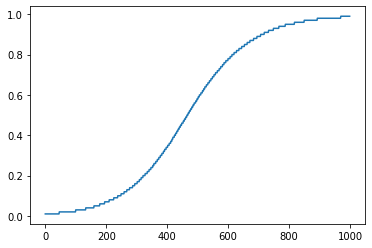

In [1]:
import numpy as np
import matplotlib.pyplot as plt

LOG_FILE = "log/Sim_Aug-23-2021-16-08-06.log"
CSV_FILE = "data/data_Aug-23-2021-16-08-06_n-0.03_.csv"

file = open(LOG_FILE).readlines()
array = [float(line) for line in file[1:]]

plt.plot(array)

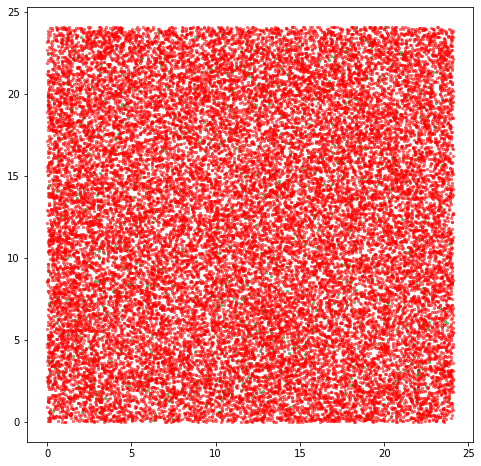

In [2]:
import pandas as pd

df = pd.read_csv(CSV_FILE)

# add figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

cellsx = df["locx"][df["state"] == True]
cellsy = df["locy"][df["state"] == True]
emptyx = df["locx"][df["state"] == False]
emptyy = df["locy"][df["state"] == False]

ax.scatter(cellsx, cellsy, color='green', s=5, alpha=0.5)
ax.scatter(emptyx, emptyy, color='red', s=5, alpha=0.5)

In [3]:
df

,Unnamed: 0,state,locx,locy,gain-r-0.95,r-0.95,gain-r-1.43,r-1.43,gain-r-1.90,r-1.90,...,gain-r-3.33,r-3.33,gain-r-3.81,r-3.81,gain-r-4.29,r-4.29,gain-r-4.76,r-4.76,gain-r-5.24,r-5.24
0,0,False,13.222862,17.231447,0.035714,0.035714,-0.015714,0.020000,0.002767,0.022767,...,-0.001618,0.035654,0.000386,0.036040,-0.000069,0.035971,-0.002335,0.033637,-0.000484,0.033153
1,1,False,14.522706,13.128167,0.014286,0.014286,0.000684,0.014970,0.009210,0.024180,...,0.000821,0.028809,0.003070,0.031879,0.000551,0.032431,-0.000597,0.031833,0.000072,0.031905
2,2,False,10.207346,15.561878,0.000000,0.000000,0.020202,0.020202,0.004466,0.024668,...,0.003271,0.027582,0.003709,0.031291,-0.001156,0.030135,-0.000830,0.029305,-0.001425,0.027880
3,3,False,10.543027,21.485972,0.033898,0.033898,0.004458,0.038356,-0.007300,0.031056,...,0.000686,0.035017,-0.002162,0.032855,-0.001498,0.031358,-0.000087,0.031270,-0.000908,0.030362
4,4,False,23.218051,9.238465,0.006849,0.006849,0.003052,0.009901,0.010633,0.020534,...,0.003392,0.021613,0.003404,0.025016,0.000375,0.025392,-0.000200,0.025191,0.000625,0.025816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,False,22.169286,19.606073,0.044586,0.044586,-0.006611,0.037975,-0.006003,0.031972,...,-0.002389,0.019972,0.000635,0.020607,-0.001164,0.019443,0.002110,0.021553,-0.000173,0.021380
29996,29996,False,16.462422,20.939635,0.047619,0.047619,-0.002406,0.045213,-0.013914,0.031299,...,-0.000736,0.030000,0.000608,0.030608,-0.000984,0.029624,0.001000,0.030625,0.001199,0.031824
29997,29997,False,10.298033,21.280554,0.028409,0.028409,0.006443,0.034853,0.002589,0.037441,...,-0.001374,0.032832,0.001264,0.034096,-0.002533,0.031563,-0.000707,0.030856,0.000172,0.031029
29998,29998,False,9.157504,4.071908,0.020548,0.020548,-0.004972,0.015576,-0.000192,0.015385,...,0.007201,0.035539,-0.000723,0.034815,-0.000056,0.034759,0.001574,0.036333,0.000959,0.037292


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier as RF


columns = [item for item in df.columns[1:] if 'gain' in item]
data = df[columns]
targets = df["state"]

X_train, X_test, y_train, y_test = train_test_split(
    data, targets, random_state=100)

n_est = 100
model = RF(n_estimators=n_est).fit(X_train, y_train)

# output
print("Trained Random Forest with n_est=%d." % n_est)
print("--- Test Sample Size: \t %d" % y_test.size)
print("--- Train Sample Size: \t %d" % y_train.size)
print("\n--> Score: \t %.2f" % model.score(X_test, y_test))

# calculate importances
imp = permutation_importance(
    model, X_test, y_test,
    n_repeats=10, random_state=100, scoring='roc_auc')


Trained Random Forest with n_est=100.
--- Test Sample Size: 	 7500
--- Train Sample Size: 	 22500

--> Score: 	 0.97



-----------------------
Fit:
--> r0 = 1.909 +\- 0.646
--> a = 0.415 +\- 40300819.850


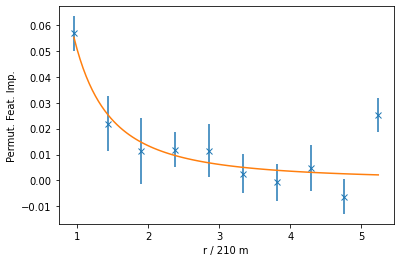

In [9]:
from numpy import array, inf, exp
from scipy.optimize import curve_fit

def model(x, a, r0):
    return a * exp(- x / r0)

def model_power_law(x, a, r, x0):
    return a * (x / x0)**(-1.0 * r)

mean = imp.importances_mean
std = imp.importances_std

# plot result
fig = plt.figure()

labels = [float(txt.split('gain-r-')[-1]) for txt in columns]
plt.errorbar(labels, mean, yerr=std, fmt='x')

rmin = labels[0]
rmax = labels[-1]
xs = np.linspace(rmin, rmax, 100)

# fit exp function to data
x0 = array([0.0, 0.1, 0.01])
bnds = (array([-inf, 0.0, 0.0]), array([inf, inf, inf]))
popt, pcov = curve_fit(model_power_law, labels, mean[:], p0=x0, bounds=bnds)
plt.plot(xs, model_power_law(xs, *popt))

perr = np.sqrt(np.diag(pcov))

print("\n-----------------------")
print("Fit:")
print("--> r0 = %.3f +\- %.3f" % (popt[1], perr[1]))
print("--> a = %.3f +\- %.3f" % (popt[0], perr[0]))

plt.xlabel("r / 210 m")
plt.ylabel("Permut. Feat. Imp.")
plt.show()

In [45]:
from scipy.spatial.distance import pdist, squareform

x = array([[0,10],[10,10],[20,20]])
print(x.dtype)
squareform(np.asarray(pdist(x), dtype='float32')).dtype


int32


dtype('float32')